In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

2023-11-01 01:30:13.858228: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 01:30:13.860657: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 01:30:13.890294: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 01:30:13.890336: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 01:30:13.890374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# load the dataset from tensorflow

(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

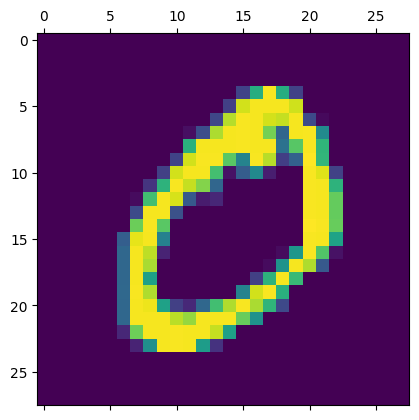

In [5]:
plt.matshow(X_train[1])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
# scaling
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flatten = X_train.reshape(60000,28*28)
X_test_flatten = X_test.reshape(10000,28*28)

In [10]:
X_train_flatten.shape

(60000, 784)

In [11]:
model = keras.Sequential([
        keras.layers.Dense( 10,
                           input_shape=(784,),
                           activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
%%time
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 786us/step - loss: 0.4706 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 1s 689us/step - loss: 0.3044 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 1s 710us/step - loss: 0.2736 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 654us/step - loss: 0.2671 - accuracy: 0.9259
CPU times: user 9.1 s, sys: 945 ms, total: 10 s
Wall time: 7.46 s


In [14]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 610us/step - loss: 0.2665 - accuracy: 0.9269


[0.2665373980998993, 0.9269000291824341]

In [15]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 487us/step


In [16]:
y_predicted[0]

array([1.40694985e-02, 2.20950284e-07, 5.73887825e-02, 9.50376868e-01,
       1.85229664e-03, 8.11284781e-02, 1.33861568e-06, 9.99720335e-01,
       6.60094768e-02, 6.11585021e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

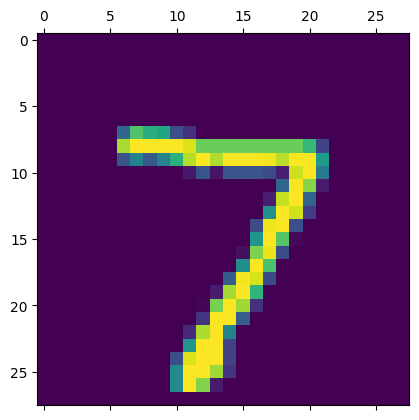

In [18]:
plt.matshow(X_test[0])

In [19]:
model = keras.Sequential(
    [
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
%%time
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2753 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1246 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0663 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9841
CPU times: user 15.4 s, sys: 1.11 s, total: 16.5 s
Wall time: 11.3 s


In [22]:
model.evaluate(X_test_flatten,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9709


[0.0941758081316948, 0.9708999991416931]

In [23]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 793us/step


In [24]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
# y_predicted_label

In [25]:
cm = tf.math.confusion_matrix(y_test,y_predicted_label)

In [26]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    1,    2,    9,    0,    0,    4,    9],
       [   0, 1117,    5,    3,    1,    3,    1,    1,    4,    0],
       [   3,    0,  993,   11,    5,    0,    2,    5,   13,    0],
       [   0,    0,    3,  990,    1,    5,    0,    0,    2,    9],
       [   0,    0,    2,    1,  961,    0,    1,    2,    1,   14],
       [   2,    0,    0,    7,    1,  879,    1,    0,    2,    0],
       [   7,    3,    2,    1,   12,   20,  908,    1,    4,    0],
       [   1,    2,   10,    9,    3,    0,    0,  989,    1,   13],
       [   4,    0,    2,   13,    4,    9,    1,    2,  932,    7],
       [   1,    3,    0,    6,    7,    2,    0,    2,    1,  987]],
      dtype=int32)>

In [27]:
import seaborn as sns

<Axes: >

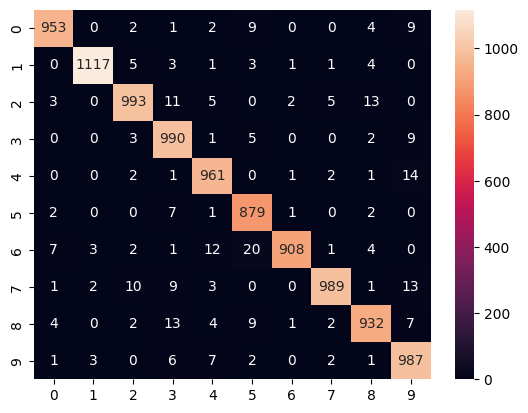

In [28]:
sns.heatmap(cm,
            annot=True,
            fmt='d')

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0521 - accuracy: 0.9839


In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 729us/step - loss: 0.0797 - accuracy: 0.9742


[0.07968489080667496, 0.9742000102996826]

In [32]:
1

1